In [2]:
import pandas as pd
import datetime

import json as json
from pandas.io.json import json_normalize

import numpy as np
import os
import scipy.optimize as sco
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
array_dataframe = []
dados = pd.DataFrame([])

folder_candle = '14400seconds'

for entry in os.scandir(folder_candle):
    if entry.is_file():
        coin_symbol = (os.path.splitext(entry.name)[0])        
        with open(entry.path) as d:            
            coin_hist = json.load(d);
        df = json_normalize(coin_hist);
        
        df['coin'] = coin_symbol
        df['date'] = pd.to_datetime(df['date'], unit='s')
        df['date_chart'] = pd.to_datetime(df['date'], unit='s', format='%Y-%m-%d').dt.date
        df['variation'] = df['close'].sub(df['open'])        
        df['variation_volume'] = df['volume'].sub(df['volume'].shift(1))
        df['return'] = np.divide(df['close'].sub(df['open']),df["close"].shift(1))
        df['log_return'] =  np.log(df['close']) - np.log(df['close'].shift(1)) 
        df['log_volume'] = np.log(df['volume'])        
        
        array_dataframe.append(df)       
        
dados = pd.concat(array_dataframe)

dados = dados.replace([np.inf, -np.inf], np.nan)
dados = dados.fillna(0)

dados.head()

/home/nikolasmagno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


,close,date,high,low,open,quoteVolume,volume,weightedAverage,coin,date_chart,variation,variation_volume,return,log_return,log_volume
0,540.000000,2017-08-14 00:00:00,0.330000,200.000000,0.330000,994.980943,4.361499e+05,438.349981,USDT_BCH,2017-08-14,539.670000,0.000000,0.000000,0.000000,12.985741
1,301.921559,2017-08-14 04:00:00,540.000000,300.000000,500.000000,2051.860477,7.042301e+05,343.215374,USDT_BCH,2017-08-14,-198.078441,268080.182127,-0.366812,-0.581402,13.464860
2,304.950000,2017-08-14 08:00:00,314.743723,300.000000,307.200000,1715.091816,5.224386e+05,304.612616,USDT_BCH,2017-08-14,-2.250000,-181791.455425,-0.007452,0.009981,13.166263
3,300.490000,2017-08-14 12:00:00,309.100001,293.000000,305.700000,3345.890570,1.005039e+06,300.380049,USDT_BCH,2017-08-14,-5.210000,482600.170011,-0.017085,-0.014733,13.820537
4,296.000000,2017-08-14 16:00:00,300.490200,289.977286,300.489999,2798.249551,8.222882e+05,293.858060,USDT_BCH,2017-08-14,-4.489999,-182750.589277,-0.014942,-0.015055,13.619846


In [4]:
grouped_data = dados.groupby('coin', as_index=False)

sorted_grouped_data = sorted(
    grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
    key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
    reverse=True  # largest first
)

grouped_data.describe()

close                                                                \
    count         mean          std         min         25%         50%   
0  2470.0  1006.705045   584.693122  286.624038  566.407289  834.710181   
1  7908.0  3031.003492  3833.996608  178.719313  409.027950  769.804319   
2  7924.0   153.755367   239.070537    0.039997    5.899997   11.899525   
3  6891.0   212.501116   282.301495    0.419524    9.651008   18.529592   
4  7811.0    41.904492    63.304709    0.045000    3.520000    4.127739   
5  7924.0    61.801497    94.281448    0.099000    0.629792   10.170000   
6  7901.0     0.207660     0.370311    0.002250    0.006305    0.008700   

                                high                 ...     log_return  \
           75%           max   count         mean    ...            75%   
0  1291.602749   3709.440000  2470.0  1034.323559    ...       0.013656   
1  6106.723250  19775.000000  7908.0  3075.767686    ...       0.006970   
2   239.005795   1507.000000  7924.0   157.070342    ...       0.009106   
3   333.000000   1387.000000  6891.0   216.381227    ...       0.011173   
4    57.438508    359.722406  7811.0    42.791738    ...       0.006974   
5    98.541442    475.000000  7924.0    63.192773    ...       0.011940   
6     0.258200      3.136000  7901.0     0.213233    ...       0.007716   

            log_volume                                                        \
        max      count       mean       std        min        25%        50%   
0  0.318385     2470.0  13.082319  1.461866   8.354071  12.037010  12.976409   
1  0.210439     7908.0  10.421580  5.261332  -9.853555   7.318392  11.691779   
2  4.993903     7924.0   6.492489  5.183726 -17.034386   0.000000   7.406511   
3  0.457651     6891.0  10.313381  4.531444  -8.650725   8.168256  11.544341   
4  3.060272     7811.0   7.031803  5.645137  -9.147178   1.102375   7.483160   
5  1.212734     7924.0   6.656951  5.539435 -14.201173   0.787240   8.636735   
6  2.302589     7901.0   6.735102  6.050133 -14.924173   0.000000   6.653549   

                         
         75%        max  
0  14.060013  18.068893  
1  14.819634  18.372493  
2  11.187290  15.429879  
3  13.827583  17.459862  
4  12.413650  17.146392  
5  11.292124  16.054210  
6  12.699582  17.826146  

[7 rows x 96 columns]

In [5]:
seg_semestr2017 = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2018,1,1)) ])
seg_semestr2017.set_index('date', inplace=True)
seg_semestr2017.head()

,close,high,low,open,quoteVolume,volume,weightedAverage,coin,date_chart,variation,variation_volume,return,log_return,log_volume
date,,,,,,,,,,,,,,
2017-08-14 00:00:00,540.000000,0.330000,200.000000,0.330000,994.980943,4.361499e+05,438.349981,USDT_BCH,2017-08-14,539.670000,0.000000,0.000000,0.000000,12.985741
2017-08-14 04:00:00,301.921559,540.000000,300.000000,500.000000,2051.860477,7.042301e+05,343.215374,USDT_BCH,2017-08-14,-198.078441,268080.182127,-0.366812,-0.581402,13.464860
2017-08-14 08:00:00,304.950000,314.743723,300.000000,307.200000,1715.091816,5.224386e+05,304.612616,USDT_BCH,2017-08-14,-2.250000,-181791.455425,-0.007452,0.009981,13.166263
2017-08-14 12:00:00,300.490000,309.100001,293.000000,305.700000,3345.890570,1.005039e+06,300.380049,USDT_BCH,2017-08-14,-5.210000,482600.170011,-0.017085,-0.014733,13.820537
2017-08-14 16:00:00,296.000000,300.490200,289.977286,300.489999,2798.249551,8.222882e+05,293.858060,USDT_BCH,2017-08-14,-4.489999,-182750.589277,-0.014942,-0.015055,13.619846


In [6]:
mes_jun = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2017,7,1)) ])
mes_jun.set_index('date', inplace=True)
mes_jun.describe()

,close,high,low,open,quoteVolume,volume,weightedAverage,variation,variation_volume,return,log_return,log_volume
count,1074.000000,1074.000000,1074.000000,1074.000000,1.074000e+03,1.074000e+03,1074.000000,1074.000000,1.074000e+03,1074.000000,1074.000000,1074.000000
mean,518.969756,527.812770,507.384157,518.692604,4.794936e+05,2.138008e+06,517.909650,0.277152,3.748864e+03,0.001379,0.000828,13.342940
std,925.861753,939.909091,907.569707,925.547110,1.397021e+06,3.618499e+06,924.214043,25.096227,2.400618e+06,0.034307,0.034323,1.698434
min,0.220000,0.237486,0.201823,0.219498,4.331180e+01,7.855836e+03,0.217027,-262.000000,-1.661147e+07,-0.125923,-0.138223,8.969012
25%,31.908496,32.464967,30.742648,31.250660,1.554822e+03,1.650153e+05,31.387340,-1.053685,-2.711125e+05,-0.014427,-0.014927,12.013792
50%,94.750000,99.505024,86.334625,94.750000,4.929529e+03,5.519655e+05,94.517661,0.002356,-9.480388e+03,0.001494,0.001957,13.221238
75%,296.750008,306.873052,287.000000,297.853600,2.399728e+04,2.651736e+06,299.240220,1.636214,1.795304e+05,0.015662,0.015322,14.790724
max,2944.000000,2977.000000,2920.000000,2944.000000,1.407893e+07,3.169818e+07,2943.837202,164.073155,1.622582e+07,0.169767,0.156805,17.271770


In [7]:
seg_part_jun = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2017,6,15)) ])
seg_part_jun.set_index('date', inplace=True)
seg_part_jun.describe()

,close,high,low,open,quoteVolume,volume,weightedAverage,variation,variation_volume,return,log_return,log_volume
count,498.000000,498.000000,498.000000,498.000000,4.980000e+02,4.980000e+02,498.000000,498.000000,4.980000e+02,498.000000,498.000000,498.000000
mean,523.253901,531.570955,512.067105,522.678162,5.463923e+05,1.950235e+06,522.126991,0.575739,2.967086e+04,0.001725,0.001441,13.270640
std,952.174741,965.957902,934.003646,951.622524,1.639830e+06,3.505014e+06,950.374846,25.821867,2.350070e+06,0.032670,0.033025,1.644234
min,0.223880,0.244727,0.216800,0.226500,1.253432e+02,1.735254e+04,0.230769,-262.000000,-1.481201e+07,-0.125923,-0.138223,9.761494
25%,28.775000,29.410012,28.053890,28.851080,1.591727e+03,1.589097e+05,28.586124,-0.645735,-2.565689e+05,-0.013226,-0.013555,11.976088
50%,94.750000,99.505024,86.334625,94.750000,4.940409e+03,5.055450e+05,94.517661,0.005629,-1.207068e+04,0.002240,0.002976,13.133382
75%,258.301930,261.184200,254.004947,258.105450,1.590210e+04,2.290635e+06,257.691403,1.700000,1.701987e+05,0.016395,0.017113,14.644339
max,2944.000000,2977.000000,2920.000000,2944.000000,1.407893e+07,2.825031e+07,2943.837202,164.073155,1.622582e+07,0.166793,0.154259,17.156615


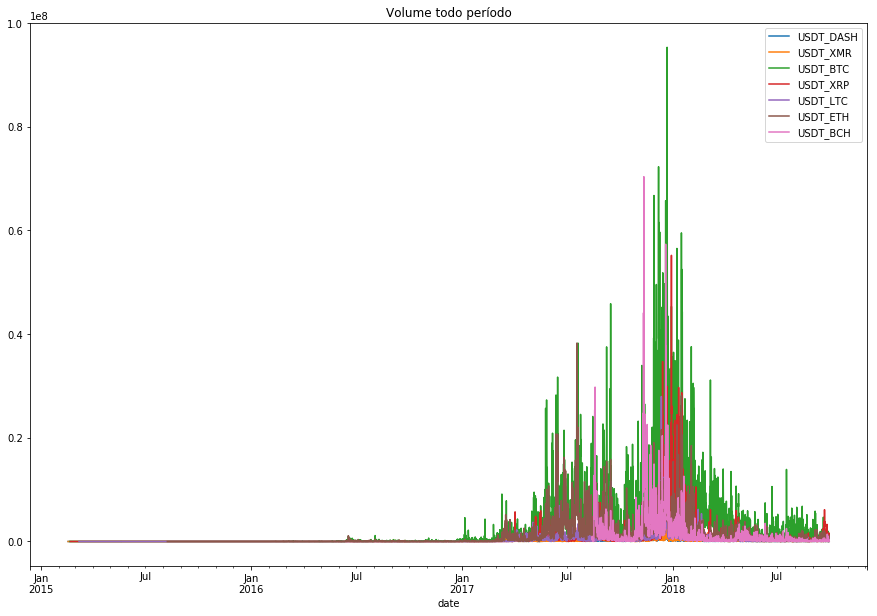

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY,scoin, log=False):    
    #data.dropna().plot(kind='density', figsize=(15,10))
    data.dropna().plot(kind='line', x=attrX, y=attrY, figsize=(15,10), ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )
    
    for scoin, stock_code_data in sorted_grouped_data:        
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
    
    plt.title('Volume todo período')

plot_all_histograms(grouped_data, plt, "date","volume")

Text(0.5, 1.0, 'Volume segundo semestre 2017')

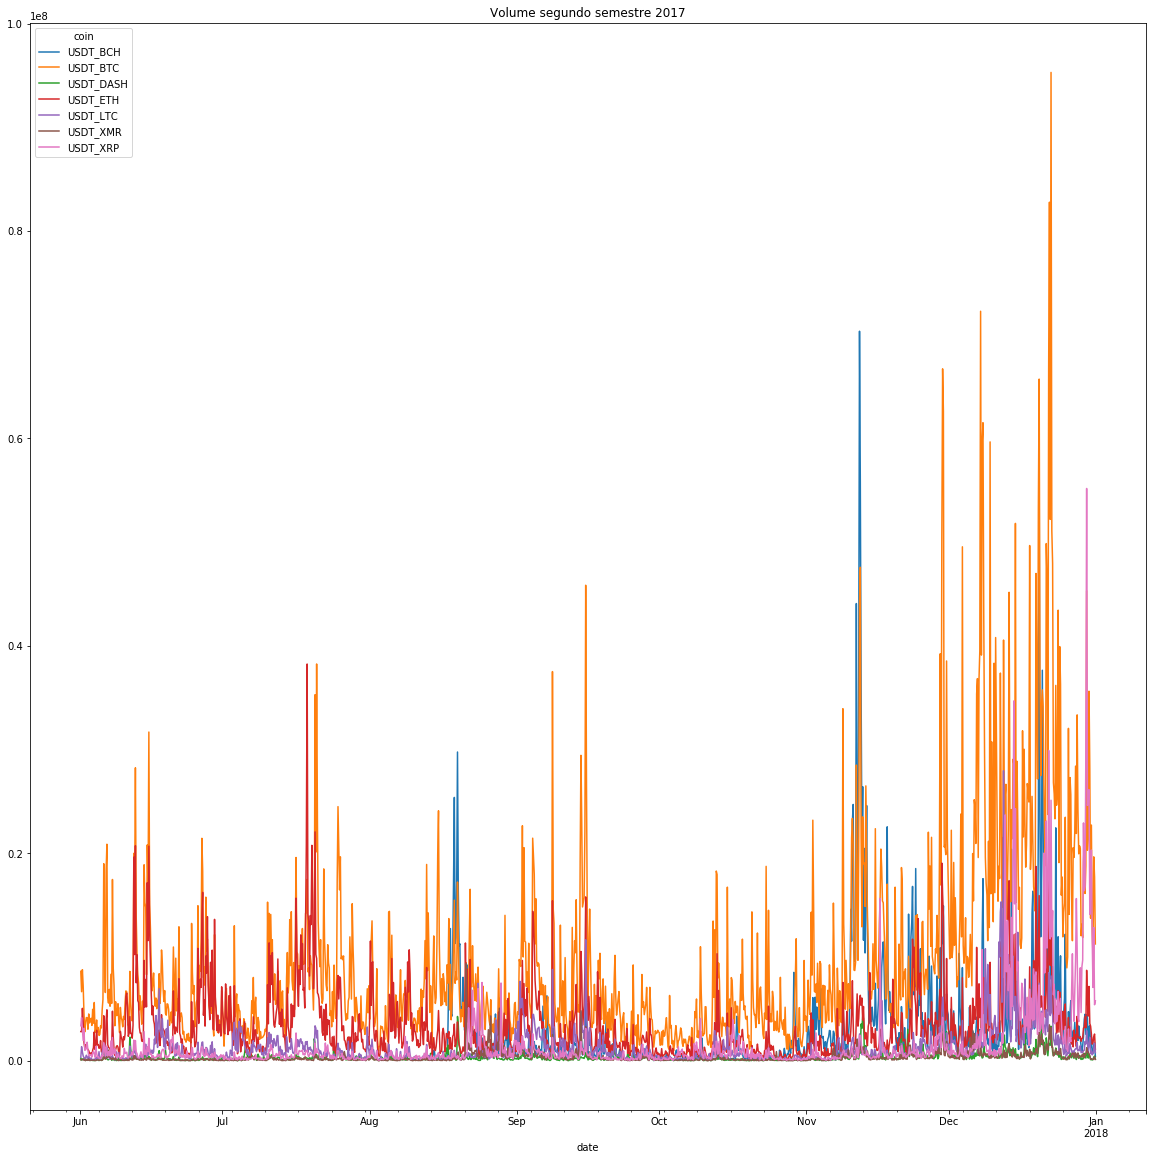

In [9]:
seg_semestr2017.pivot(columns='coin', values='volume').plot(kind='line', figsize=(20,20))
plt.title('Volume segundo semestre 2017')

Text(0.5, 1.0, 'Volume mês de Junho 2017')

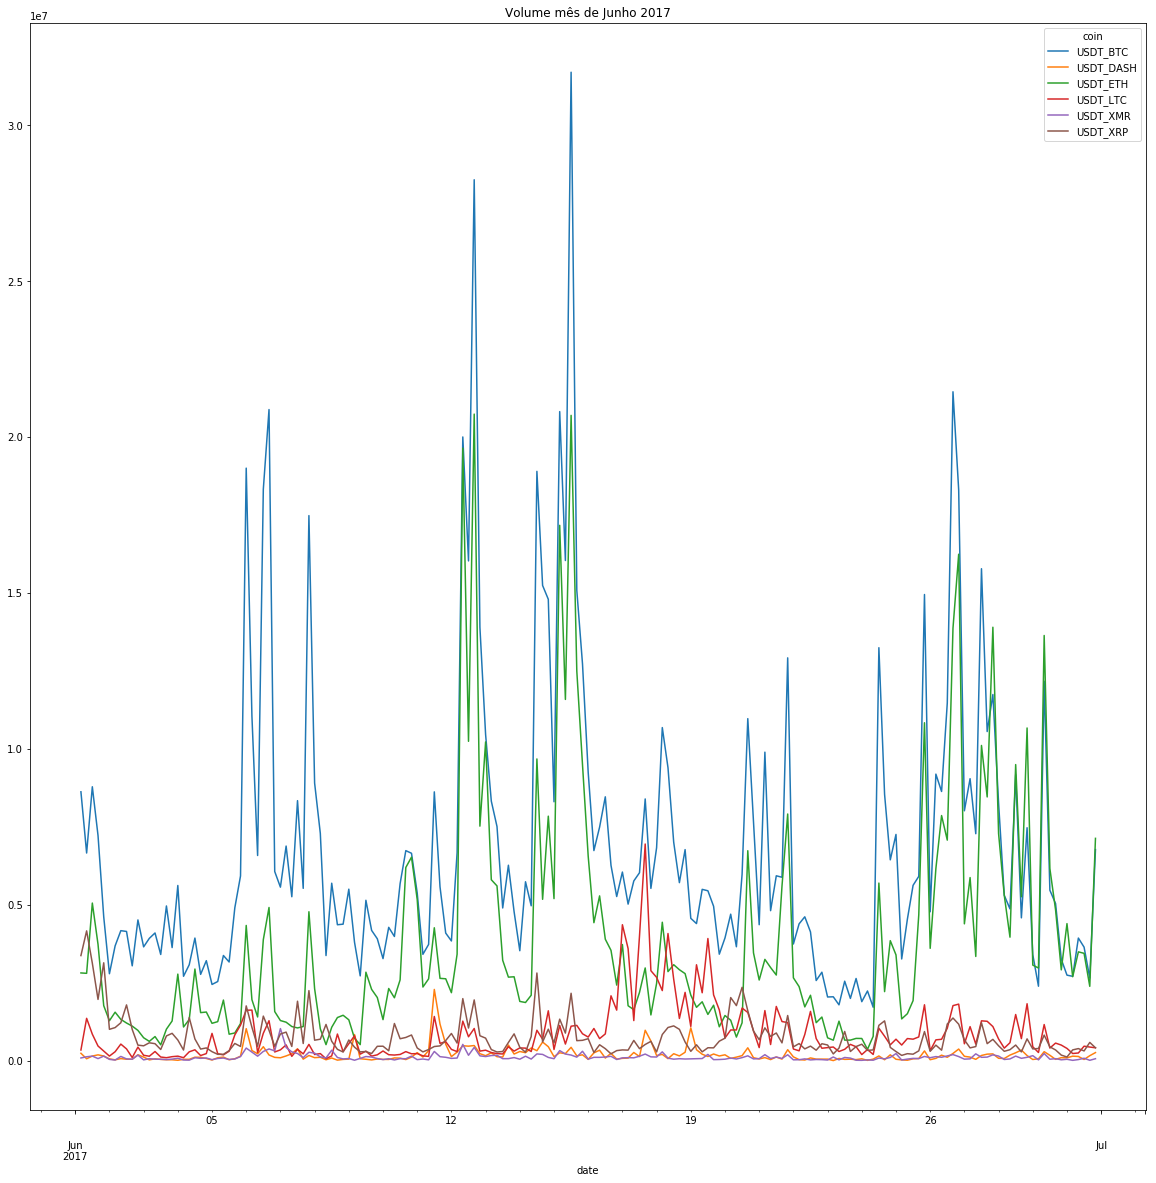

In [10]:
mes_jun.pivot(columns='coin', values='volume').plot(kind='line', figsize=(20,20))
plt.title('Volume mês de Junho 2017')

Text(0.5, 1.0, 'Volume segunda quinzena de Junho 2017')

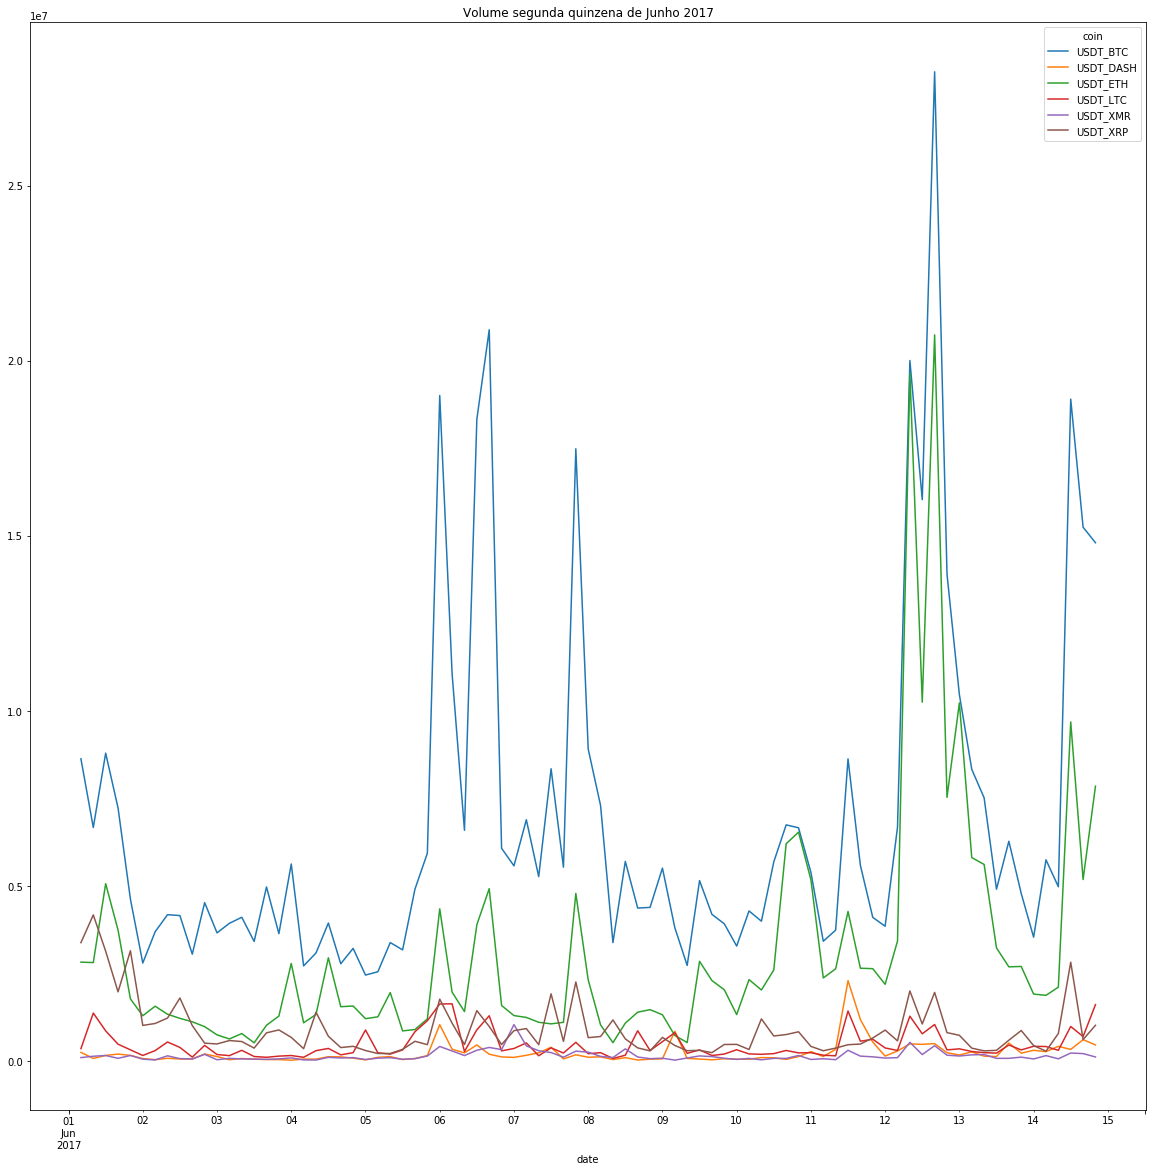

In [11]:
seg_part_jun.pivot(columns='coin', values='volume').plot(kind='line', figsize=(20,20))
plt.title('Volume segunda quinzena de Junho 2017')

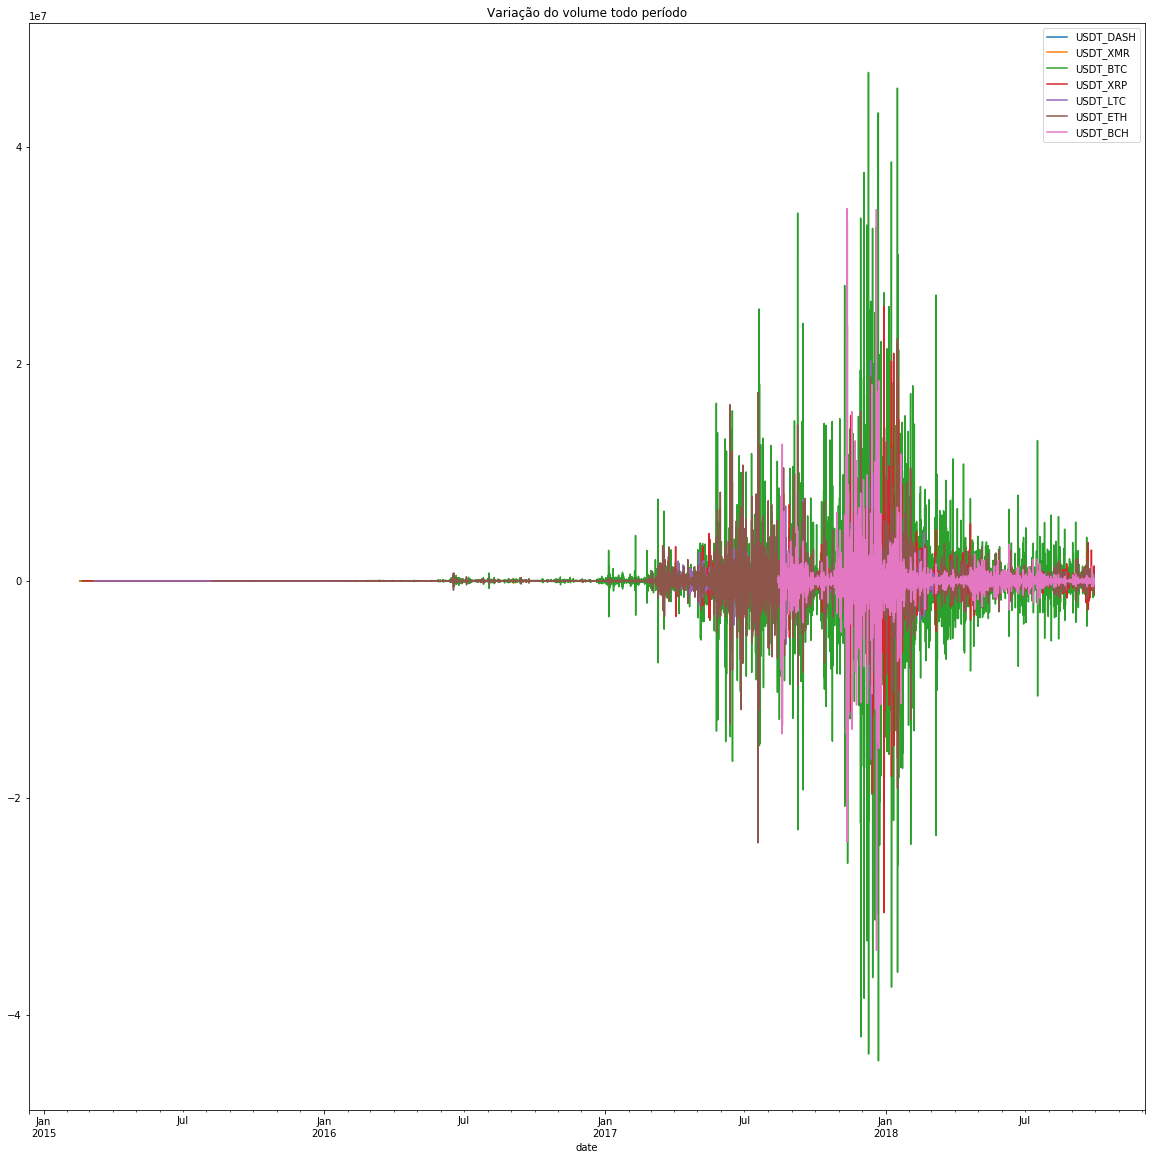

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY,scoin, log=False):    
    #data.dropna().plot(kind='density', figsize=(15,10))
    data.dropna().plot(kind='line', x=attrX, y=attrY, figsize=(20,20), ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )
    
    for scoin, stock_code_data in sorted_grouped_data:        
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
    
    plt.title('Variação do volume todo período')

plot_all_histograms(grouped_data, plt, "date","variation_volume")

Text(0.5, 1.0, 'Variação do volume segundo semestre 2017')

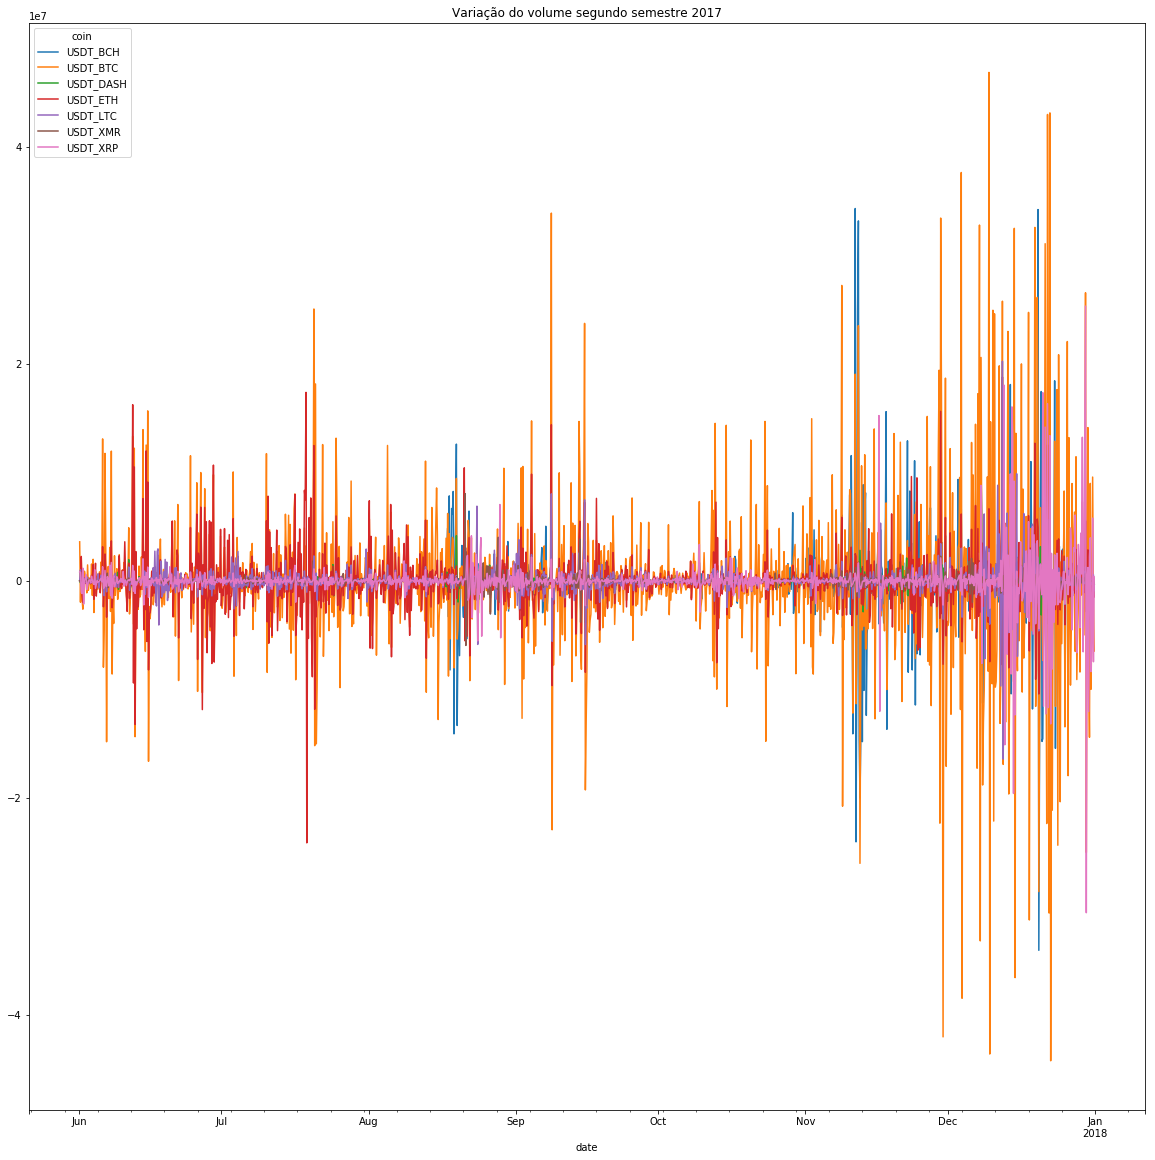

In [13]:
seg_semestr2017.pivot(columns='coin', values='variation_volume').plot(kind='line', figsize=(20,20))
plt.title('Variação do volume segundo semestre 2017')

Text(0.5, 1.0, 'Variação do volume Junho 2017')

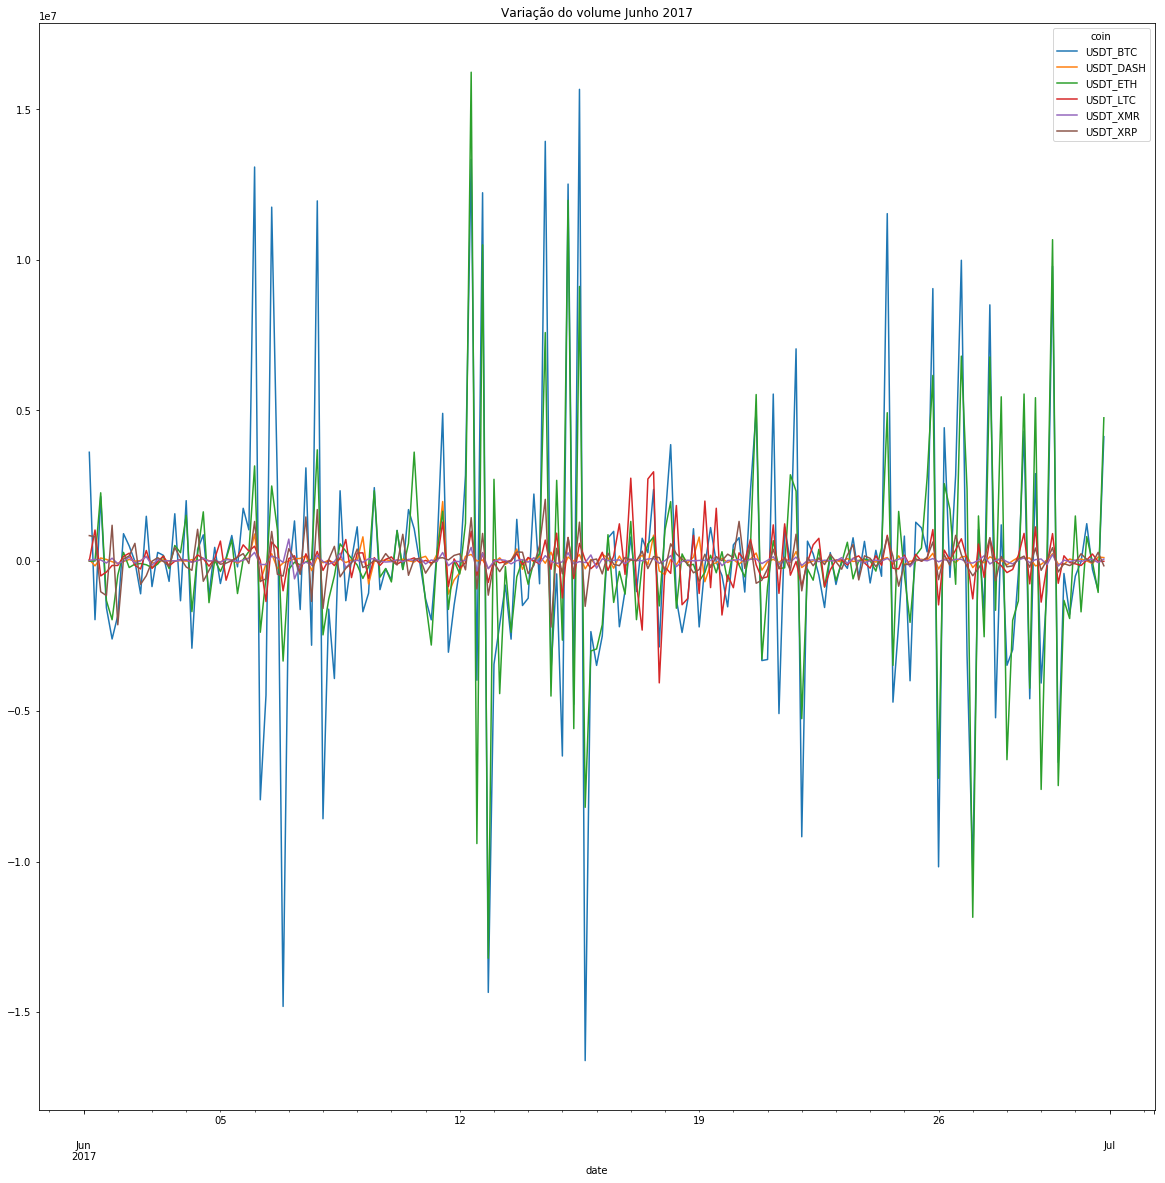

In [14]:
mes_jun.pivot(columns='coin', values='variation_volume').plot(kind='line', figsize=(20,20))
plt.title('Variação do volume Junho 2017')

Text(0.5, 1.0, 'Variação do volume segunda quinzena Junho 2017')

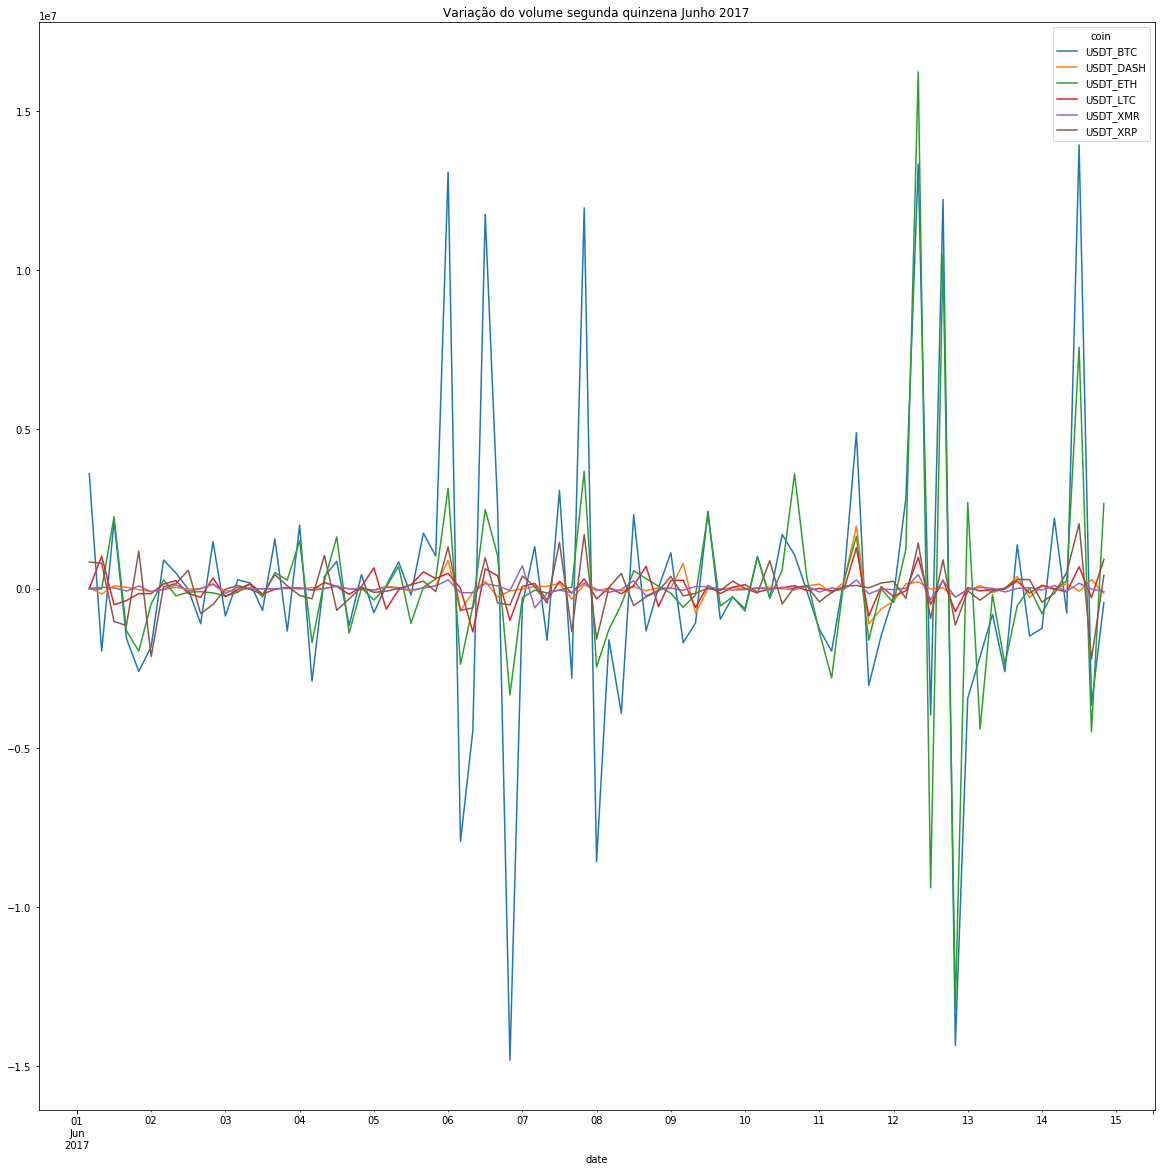

In [15]:
seg_part_jun.pivot(columns='coin', values='variation_volume').plot(kind='line', figsize=(20,20))
plt.title('Variação do volume segunda quinzena Junho 2017')

Text(0.5, 1.0, 'Volume todo período')

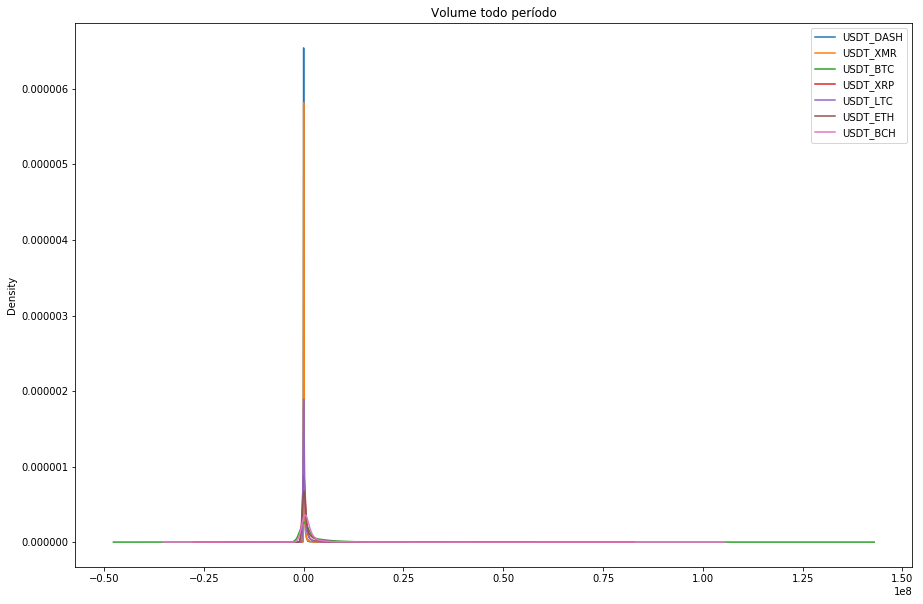

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='density',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "coin","volume")
plt.title('Volume todo período')

Text(0.5, 1.0, 'Variação do volume todo período')

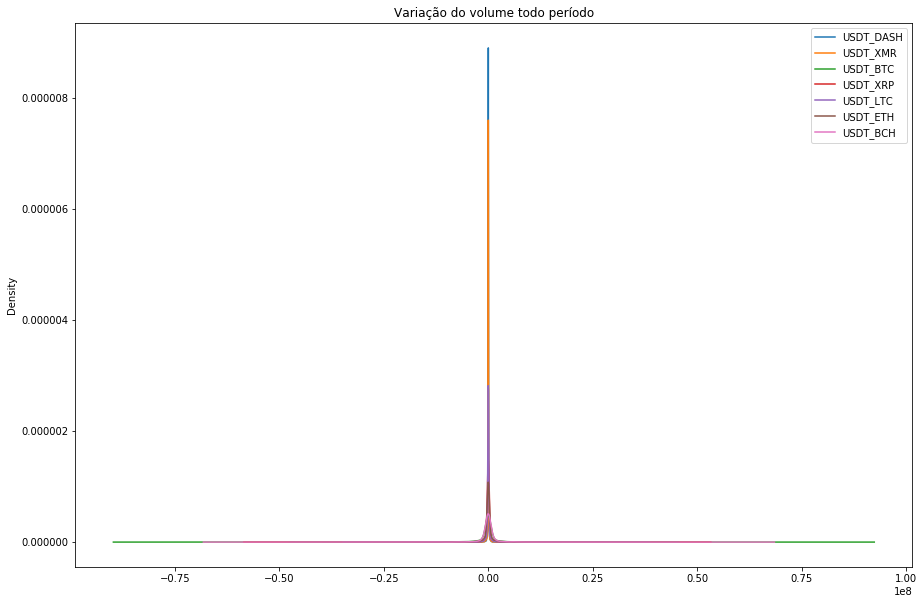

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='density',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "coin","variation_volume")
plt.title('Variação do volume todo período')

Text(0.5, 1.0, 'Volume Segundo Semestre 2017')

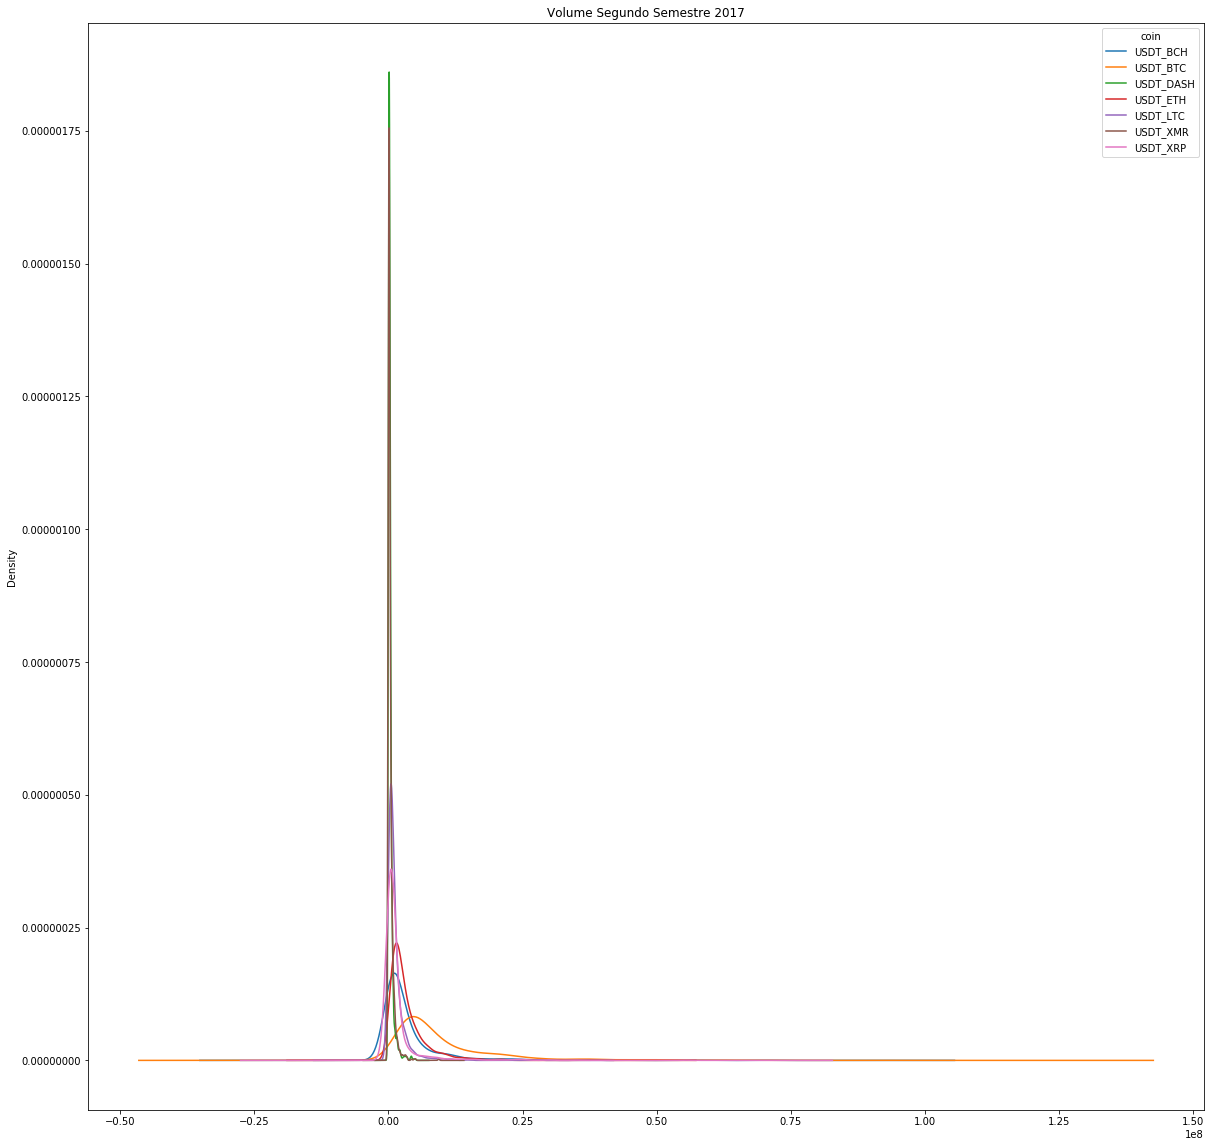

In [18]:
seg_semestr2017.pivot(columns='coin', values='volume').plot(kind='density', figsize=(20,20))
plt.title('Volume Segundo Semestre 2017')

Text(0.5, 1.0, 'Variação do Volume Segundo Semestre 2017')

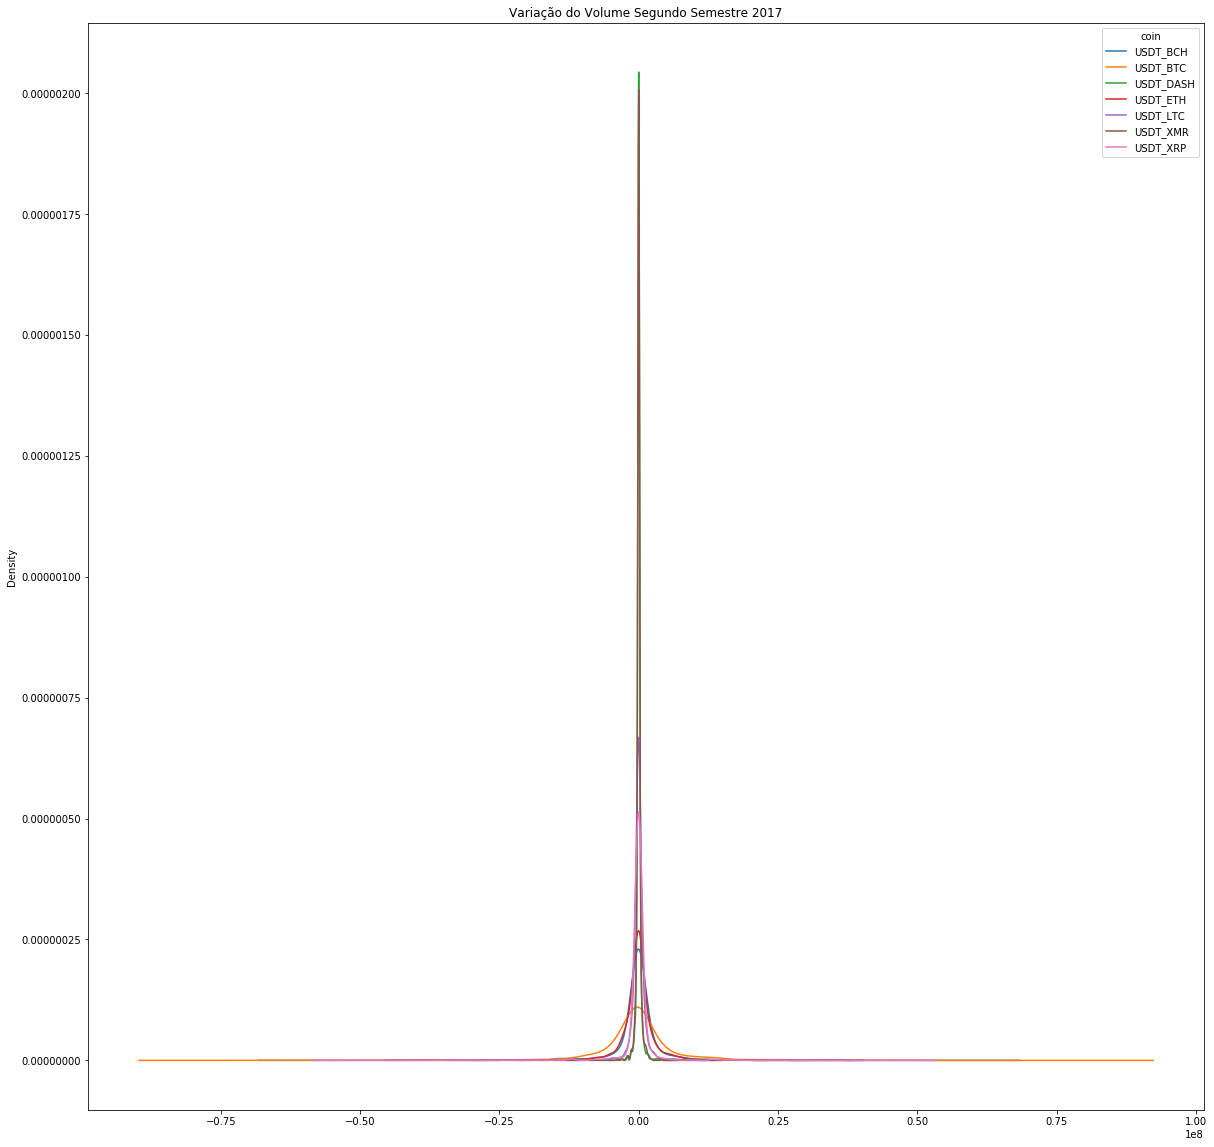

In [19]:
seg_semestr2017.pivot(columns='coin', values='variation_volume').plot(kind='density', figsize=(20,20))
plt.title('Variação do Volume Segundo Semestre 2017')

Text(0.5, 1.0, 'Volume Junho 2017')

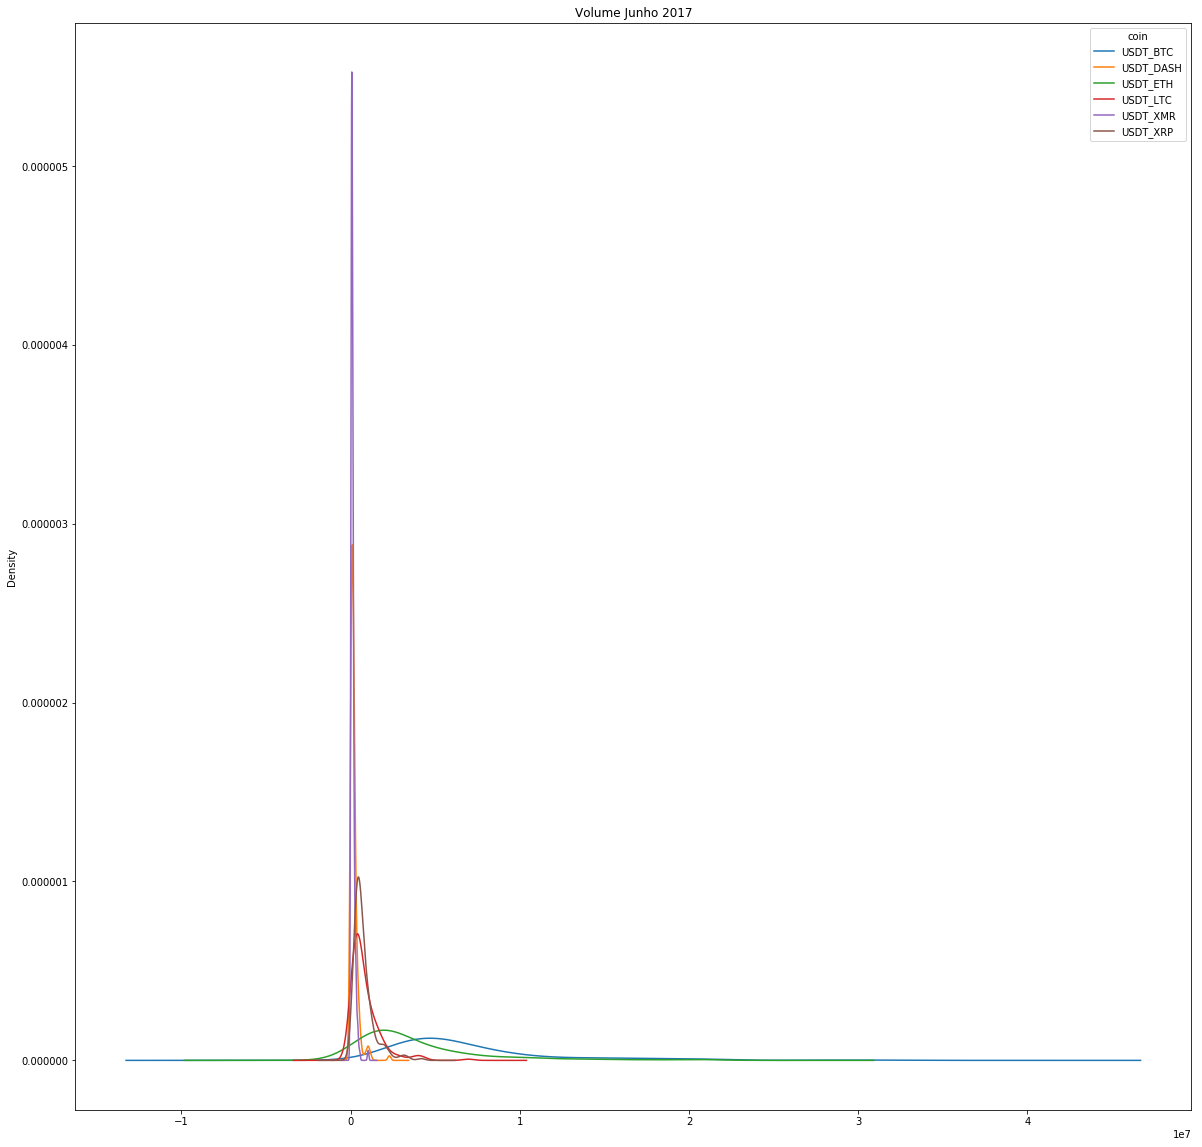

In [20]:
mes_jun.pivot(columns='coin', values='volume').plot(kind='density', figsize=(20,20))
plt.title('Volume Junho 2017')

Text(0.5, 1.0, 'Variação do volume Junho 2017')

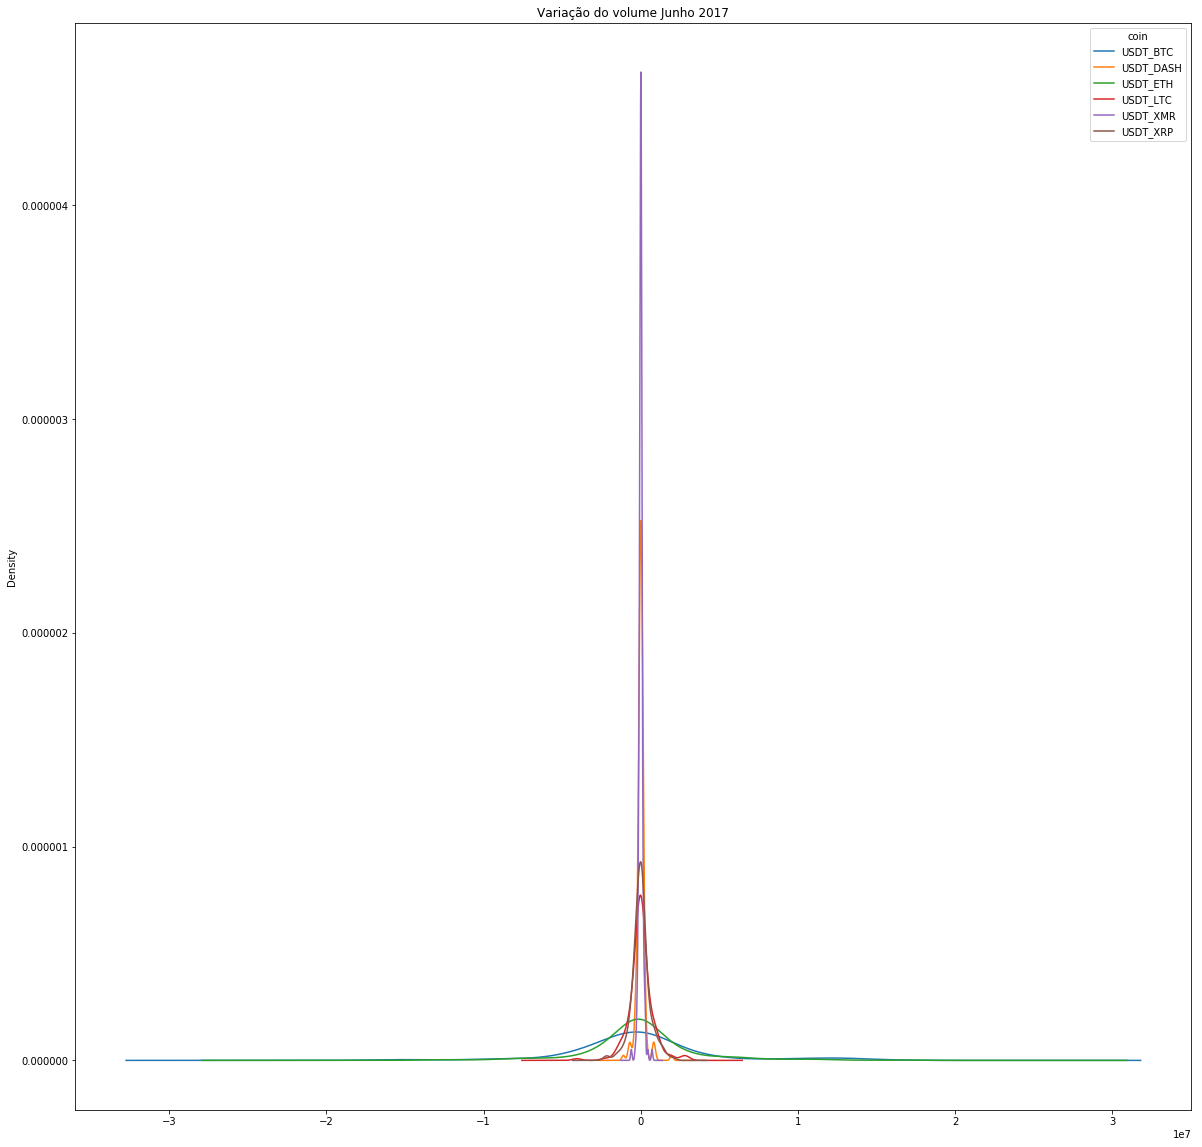

In [21]:
mes_jun.pivot(columns='coin', values='variation_volume').plot(kind='density', figsize=(20,20))
plt.title('Variação do volume Junho 2017')

Text(0.5, 1.0, 'Volume segunda quinzena Junho 2017')

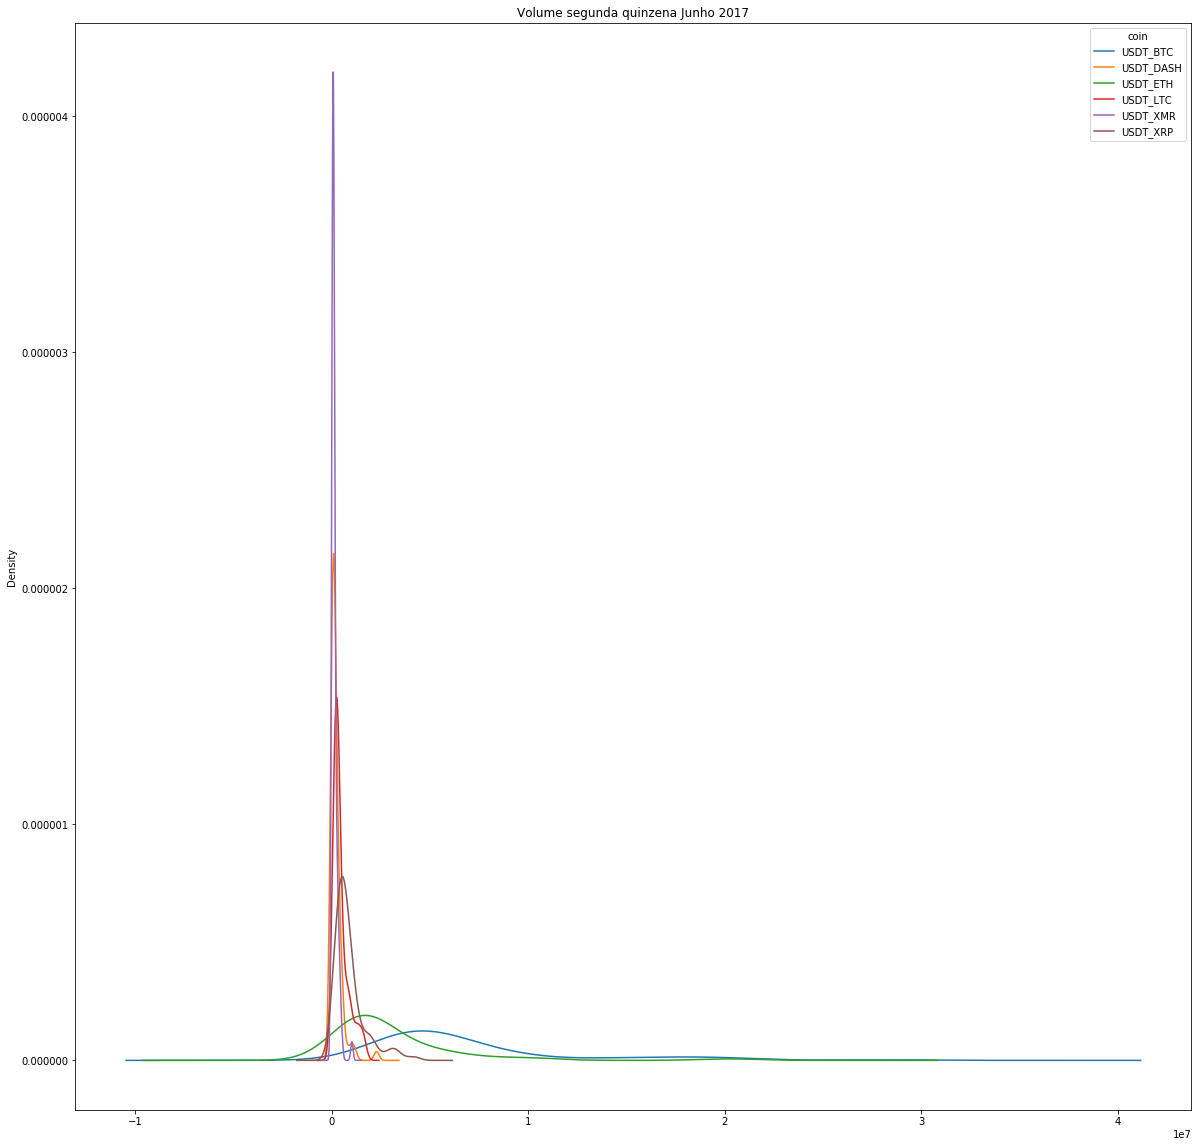

In [22]:
seg_part_jun.pivot(columns='coin', values='volume').plot(kind='density', figsize=(20,20))
plt.title('Volume segunda quinzena Junho 2017')

Text(0.5, 1.0, 'Variação do volume segunda quinzena Junho 2017')

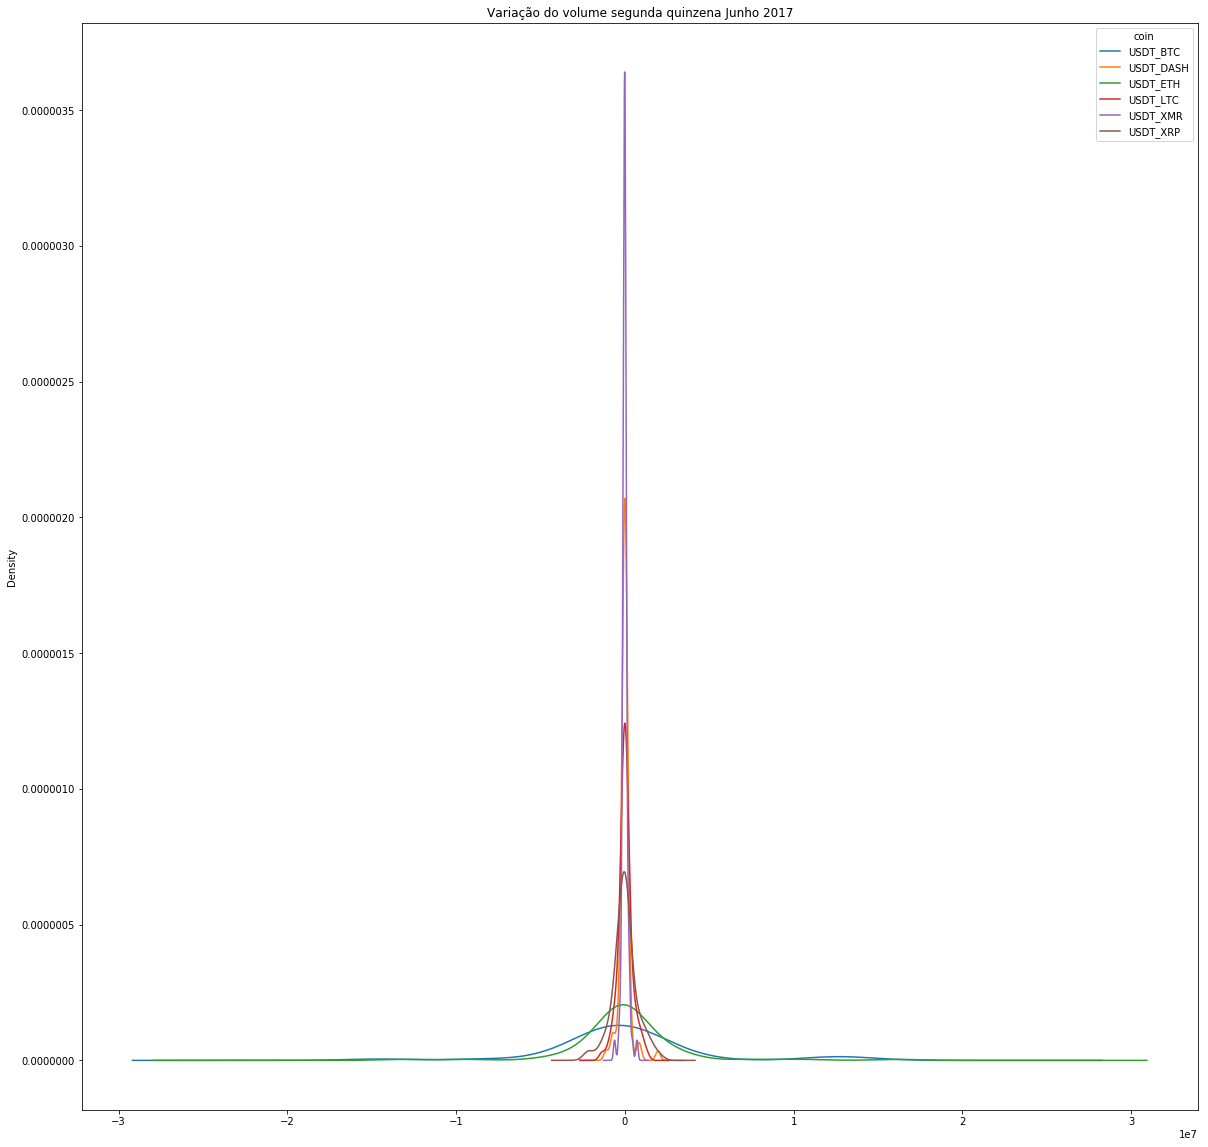

In [23]:
seg_part_jun.pivot(columns='coin', values='variation_volume').plot(kind='density', figsize=(20,20))
plt.title('Variação do volume segunda quinzena Junho 2017')

Text(0.5, 1.0, 'Retorno todo período')

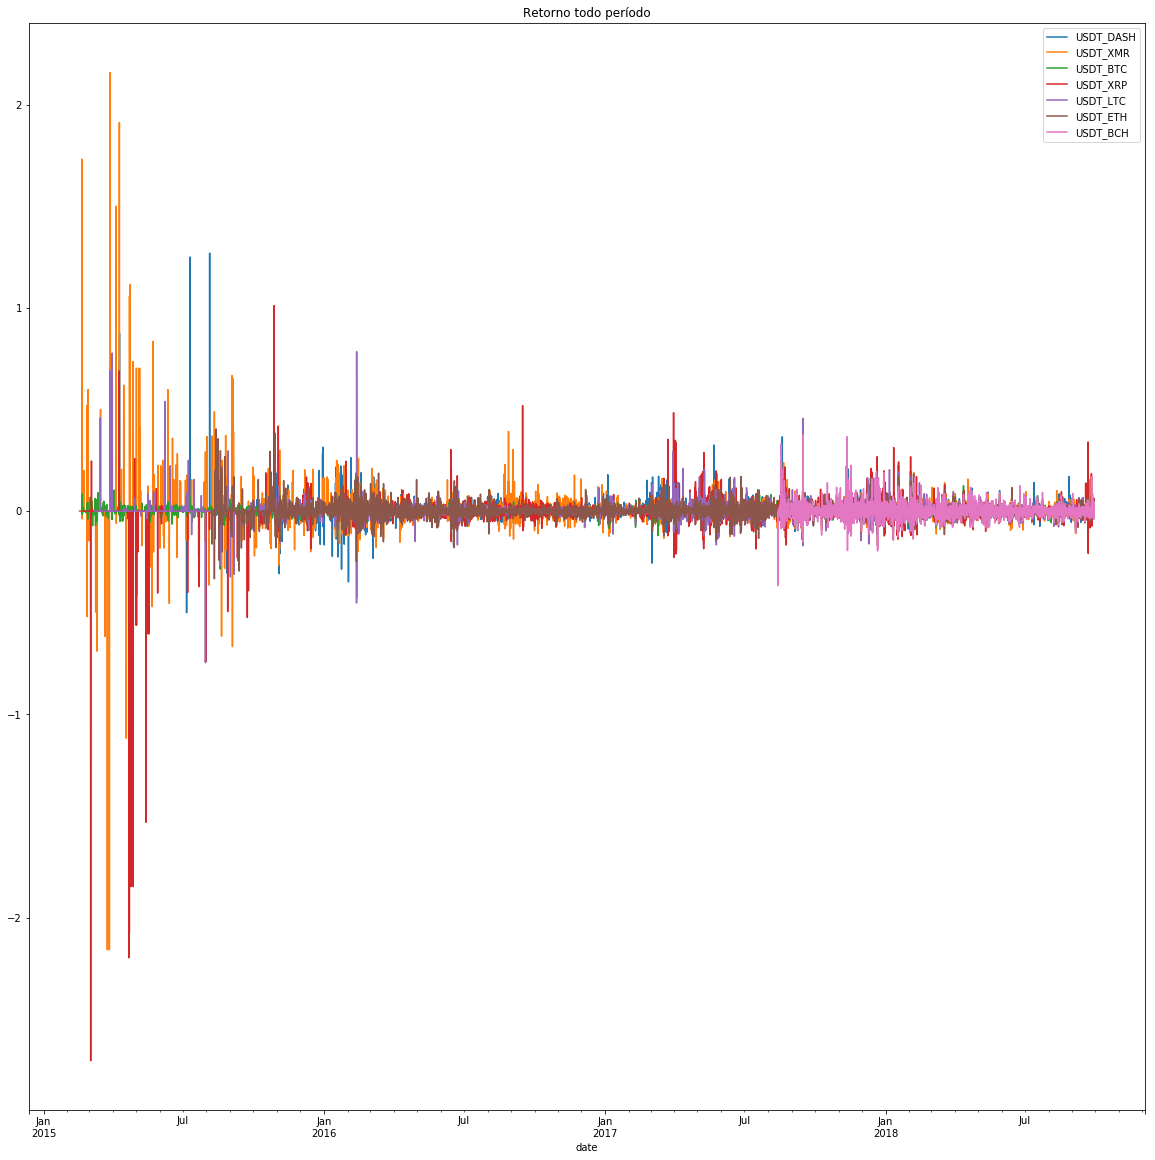

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY,scoin, log=False):    
    #data.dropna().plot(kind='density', figsize=(15,10))
    data.dropna().plot(kind='line', x=attrX, y=attrY, figsize=(20,20), ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:        
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","return")
plt.title('Retorno todo período')

Text(0.5, 1.0, 'Retorno mês de Junho 2017')

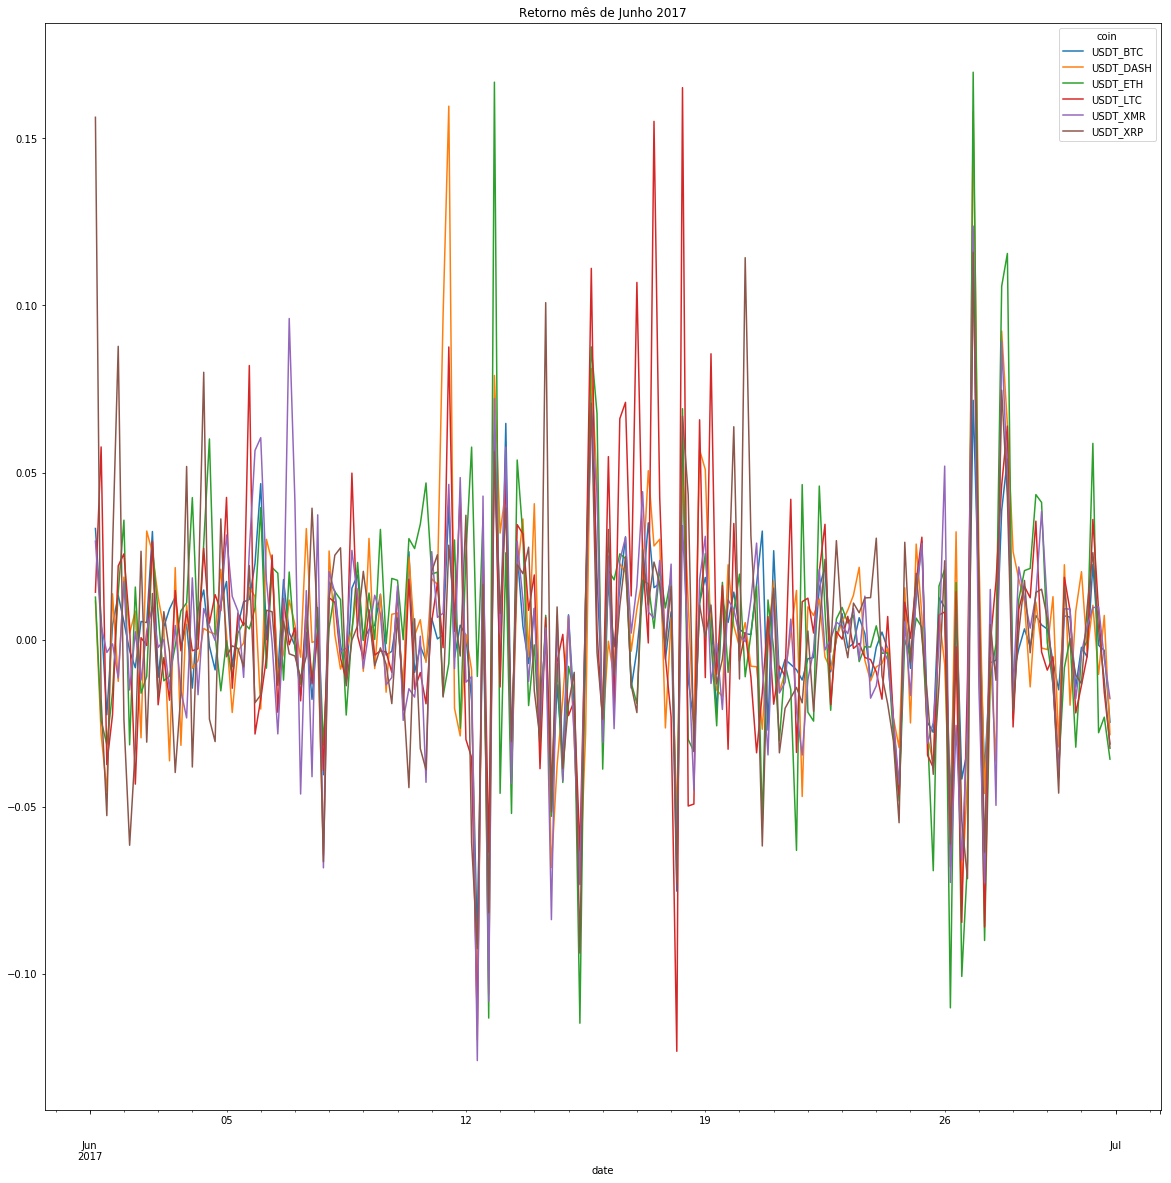

In [25]:
mes_jun.pivot(columns='coin', values='return').plot(kind='line', figsize=(20,20))
plt.title('Retorno mês de Junho 2017')

Text(0.5, 1.0, 'Retorno segunda quinzena mês de Junho 2017')

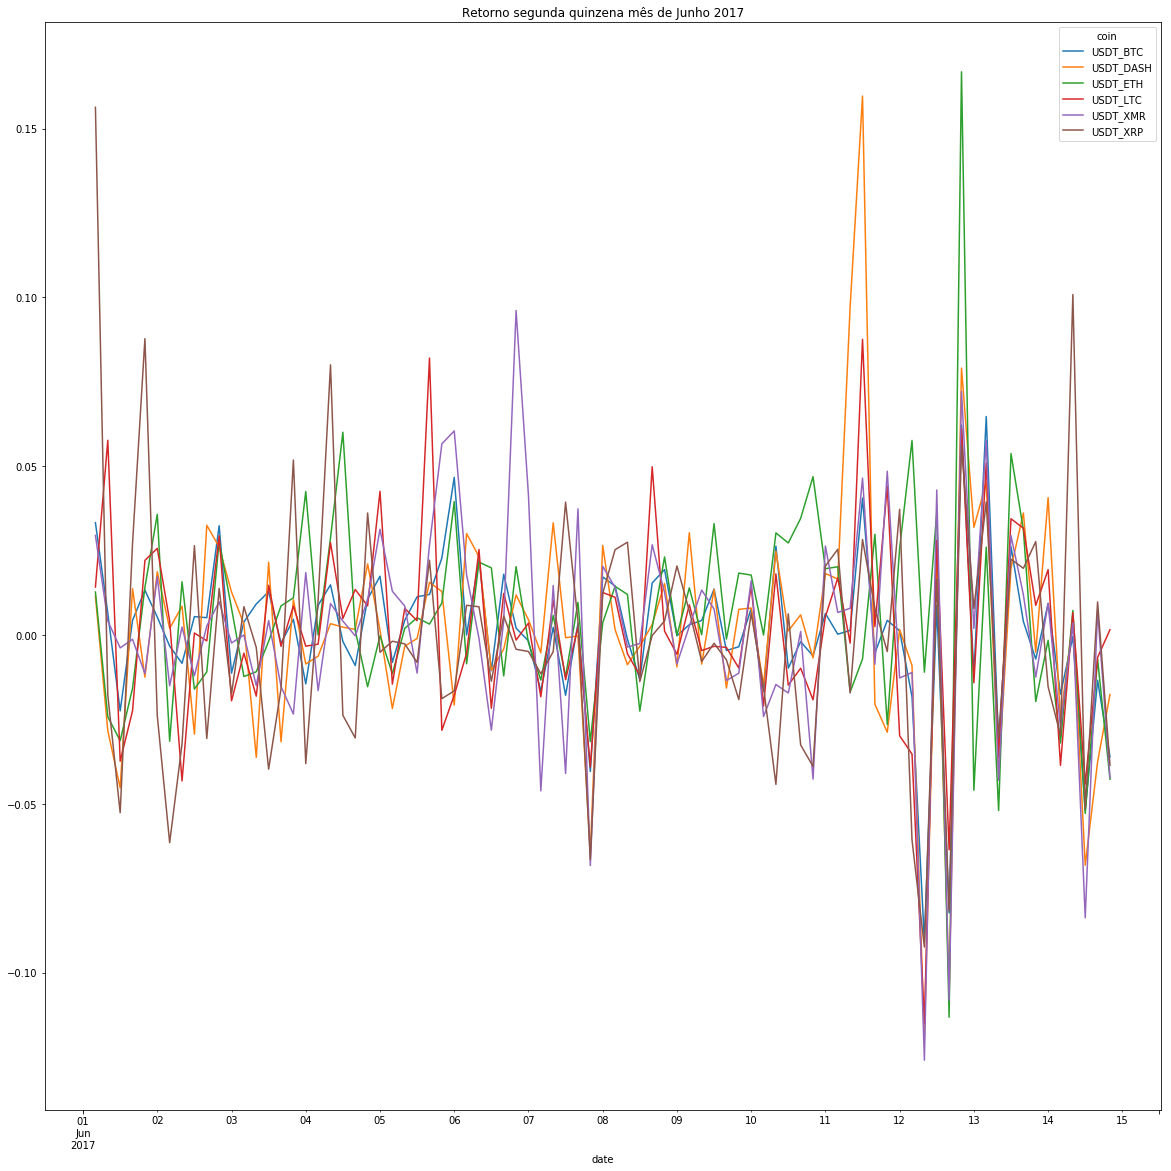

In [26]:
seg_part_jun.pivot(columns='coin', values='return').plot(kind='line', figsize=(20,20))
plt.title('Retorno segunda quinzena mês de Junho 2017')

Text(0.5, 1.0, 'Retorno segunda parte mês de Junho')

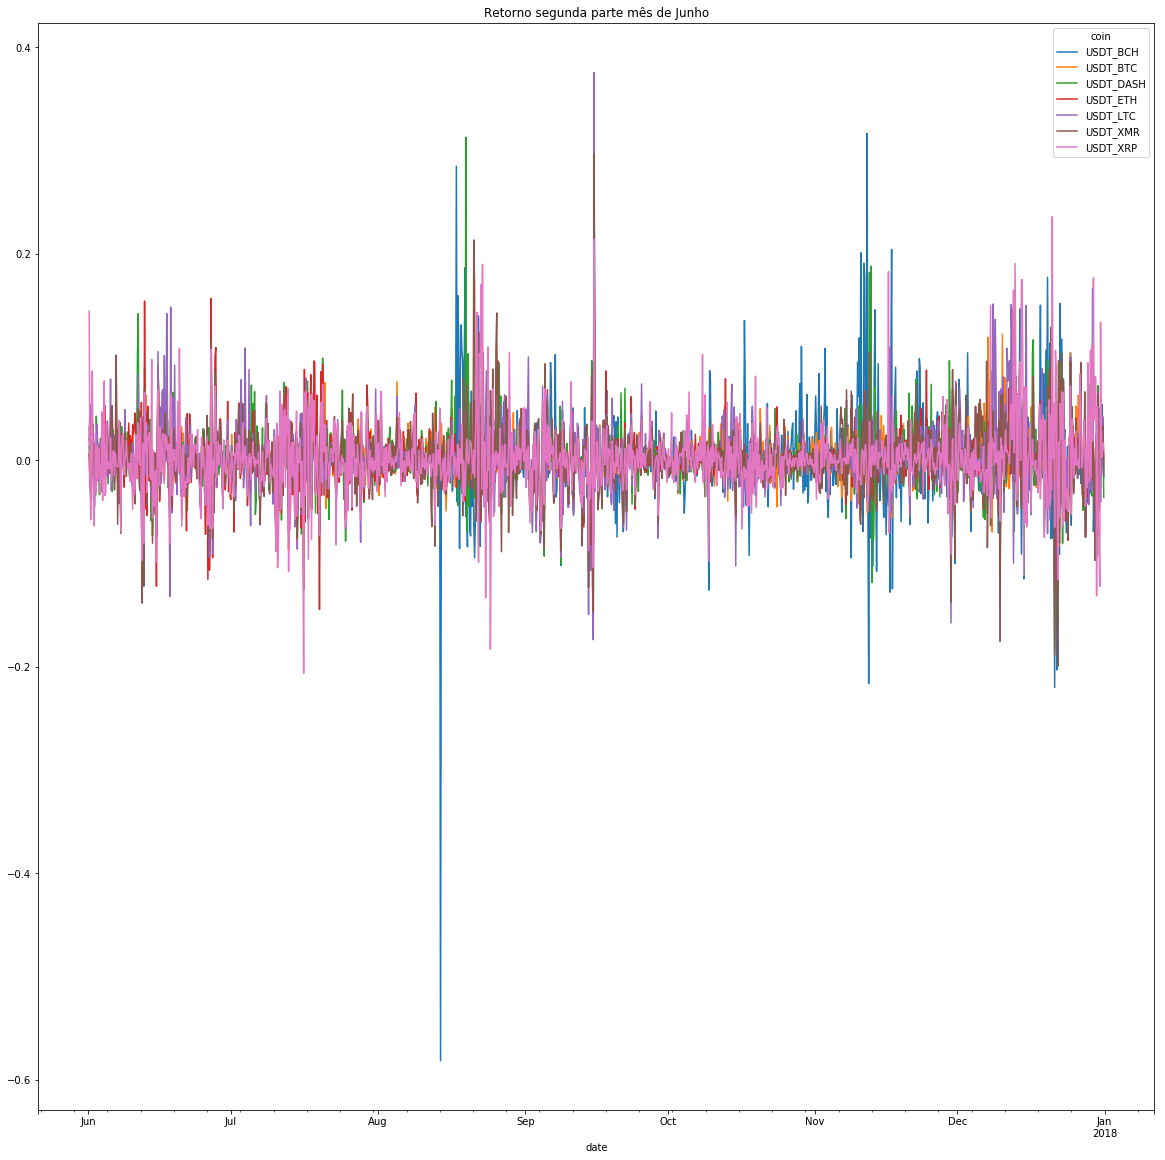

In [27]:
seg_semestr2017.pivot(columns='coin', values='log_return').plot(kind='line', figsize=(20,20))
plt.title('Retorno segunda parte mês de Junho')

In [28]:
import pandas_profiling

pandas_profiling.ProfileReport(dados) 

/usr/local/lib/python3.6/dist-packages/pandas_profiling/plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


Number of variables,16
Number of observations,48829
Total Missing (%),0.0%
Total size in memory,6.0 MiB
Average record size in memory,128.0 B
Numeric,9
Categorical,2
Boolean,0
Date,1
Text (Unique),0
Rejected,4
